# Project 1: Introduction to Airfoils and XFOIL

This project focuses on investigating types of airfoils and their geometries, calculating airfoil wake drag, and introducing XFOIL.

In [45]:
# Initial import of required modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1: Airfoil Geometry Characteristics

Several types of airfoils will be plotted and inspected to become familiar with airfoil characteristics and properties. All airfoils of the following airfoils use the NACA code to define their geometry. First, a symmetric airfoil is chosen and plotted. Next, three other cambered NACA airfoils are chosen and plotted. Finally, two NACA 5-digit airfoils are plotted with their calculated design lift coefficients and maximum camber.

### Problem 1.1: Designing Symmetric Airfoils

In this problem, a function is designed to take a NACA 4-digit symmetric airfoil and plot it using the given formula for the airfoil surface geometry based on the inputs of chord length and the maximum thickness as a percentage of the chord length. The coordinates of the airfoil geometry are given as outputs of the function.


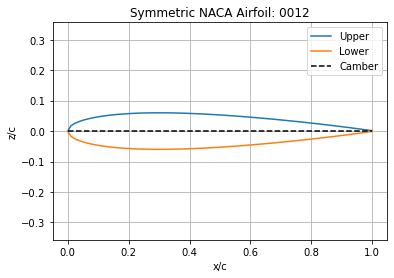

In [46]:
chord = 1 # chord length
airfoil = input('Input 4-digit symmetric NACA: ') # Let the user input a desired airfoil
if len(list(airfoil)) != 4:
    airfoil = input('Please input a 4-digit symmetric airfoil (ex: 0012): ')
# This function plots a given NACA symmetric airfoil
def airfoil_surface(airfoil, c):
    
    tau = ''.join(list(airfoil)[2:4]) # grab just the third and fourth digits from the NACA code
    t = int(tau)/100/c

    x = np.linspace(start=0, stop=1, num=100)
    x *= c # just in case chord is not 1
    # Given formula for symmetric airfoil surface points
    zt_c_upper = t/0.2*(0.2969*(x/c)**0.5 - 0.126*(x/c) - 0.3516*(x/c)**2 + 0.2843*(x/c)**3 - 0.1015*(x/c)**4) 
    zt_c_lower = -zt_c_upper # The lower surface is just the reflection of the upper surface
    camber = 0*x
    
    # output in following format: [[x], [top surface], [bottom surface], [camber]]
    return [x, zt_c_upper, zt_c_lower, camber]
    
airfoil_geometry = airfoil_surface(airfoil, chord) # run the function with the previously chosen airfoil and chord length
plt.plot(airfoil_geometry[0], airfoil_geometry[1], label='Upper') # Plot upper surface
plt.plot(airfoil_geometry[0], airfoil_geometry[2], label='Lower') # Plot lower surface
plt.plot(airfoil_geometry[0], airfoil_geometry[3], 'k', linestyle='--', label='Camber') # Plot camber line
plt.axis('equal')
plt.xlabel('x/c')
plt.ylabel('z/c')
plt.title(f'Symmetric NACA Airfoil: {airfoil}')
plt.grid()
plt.legend()
plt.show()

### Problem 1.2: Designing Cambered Airfoils

In this problem, a function is designed to plot cambered airfoils based on their NACA 4-digit codes. Three separate examples are plotted on one chart.

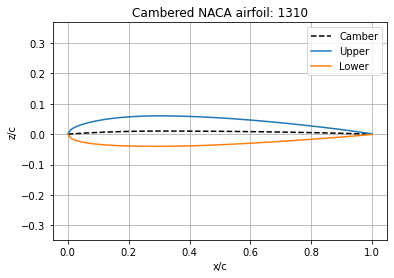

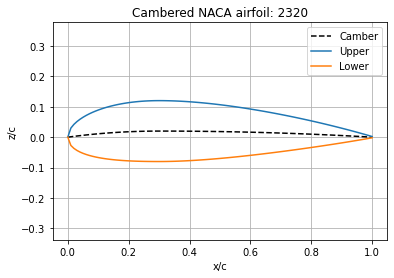

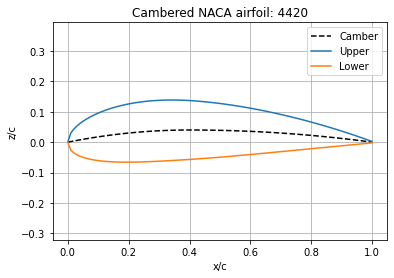

In [47]:
foil_name = ['1310', '2320', '4420'] # 3 cambered airfoils to plot
chord = 1 # chord length

def cambered_airfoil(foil_name, c, plot):
    
    for foil in foil_name:
        # computing camber line for each airfoil
        m = int(list(foil)[0]) # first digit in NACA code
        m = m/100 # camber percent of chord length
        p = int(list(foil)[1]) # second digit in NACA code
        p = p/10 # tenths of the chord
        x = np.linspace(start=0, stop=1, num=100)
        x *= c # just in case the chord is not 1
        camber = np.zeros(len(x)) # set up the camber variable
        
        for i in range(len(camber)): # looping through to define each camber point based on given formula
            if x[i] <= p*c:
                camber[i] = m/(p**2) * (2*p*(x[i]/c) - (x[i]/c)**2) # given formula for first piecewise section
            else:
                camber[i] = m/((1-p)**2) * ((1-2*p) + 2*p*(x[i]/c) - (x[i]/c)**2) # fiven formula for second piecewise section
                
        airfoil_geometry = airfoil_surface(foil, c) # using the function from 1.1 to get the airfoil's outer geometry
        zt_c_upper = np.add(camber, airfoil_geometry[1]) # using camber line to get airfoil surface because it's not symmetric
        zt_c_lower = np.add(camber, airfoil_geometry[2])        
        
        if plot:
            plt.plot(x, camber, linestyle='--', color='k', label='Camber')
            plt.plot(x, zt_c_upper, label='Upper')
            plt.plot(x, zt_c_lower, label='Lower')
            plt.xlabel('x/c')
            plt.ylabel('z/c')
            plt.title(f'Cambered NACA airfoil: {foil}')
            plt.axis('equal')
            plt.grid()
            plt.legend()
            plt.show()
        
cambered_airfoil(foil_name, chord, True)
        
        


Based on the above graphs, I would estimate that the slimmer profile of the 1310 airfoil would provide less drag than the other two airfoils but would also exhibit relatively low lift with the small amount of camber. With the increased camber and thickness of 4420, I would expect more drag due to the thickness but also more lift due to the increased camber. The 2320 airfoil would likely create similar drag as the 4420 since it has the same thickness but fall between the 4420 and 1310 in terms of lift based on the camber.

### Problem 1.3: Designing NACA 5-digit Airfoils
The following function is used to plot NACA 5-digit airfoils and display the airfoil's design lift coefficient and maximum camber.

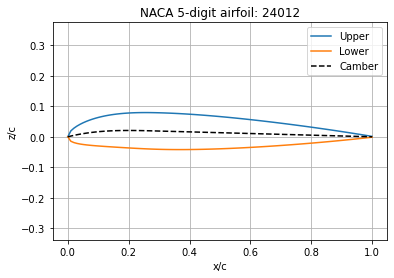

Max camber: 0.020793615810428878
Design lift coefficient: 0.3


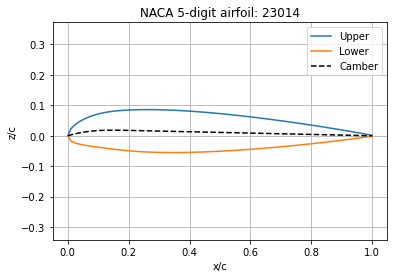

Max camber: 0.018385353574233432
Design lift coefficient: 0.3


In [48]:
airfoil_name = ['24012', '23014']
chord = 1
def cambered_airfoil_5(foil_name, c):
    for foil in foil_name:
        L = int(list(foil)[0])
        P = int(list(foil)[1])
        S = int(list(foil)[2])
        S = 0 # "For this problem, S will always be equal to 0"
        TT = int(''.join(list(foil)[3:5]))
        r = [0.058, 0.126, 0.2025, 0.29, 0.391]
        k1 = [361.400, 51.640, 15.957, 6.643, 3.230]
        x = np.linspace(start=0, stop=1, num=100)
        camber = np.zeros(len(x)) # set up the camber variable
        for i in range(len(camber)): # looping through to define each camber point based on given formula
            if x[i] < r[P-1]: # piecewise criteria
                camber[i] =  k1[P-1]/6*((x[i]**3) - (3*r[P-1]*x[i]**2)+(r[P-1])**2*(3-r[P-1])*x[i])# given formula for first piecewise section
            else:
                camber[i] =  k1[P-1]*r[P-1]**3/6*(1-x[i])# fiven formula for second piecewise section
        camber *= L/2
        # inputting thickness information into function created for problem 1.1 to get airfoil's outer geometry
        airfoil_geometry = airfoil_surface(f'00{TT}', c)
        zt_c_upper = np.add(camber, airfoil_geometry[1]) # using camber line to get airfoil surface because it's not symmetric
        zt_c_lower = np.add(camber, airfoil_geometry[2])
        plt.plot(x, zt_c_upper, label='Upper')
        plt.plot(x, zt_c_lower, label='Lower' )
        plt.plot(x, camber, label='Camber', linestyle='--', color='k')
        plt.xlabel('x/c')
        plt.ylabel('z/c')
        plt.grid()
        plt.axis('equal')
        plt.legend()
        plt.title(f'NACA 5-digit airfoil: {foil}')
        plt.show()
        print(f'Max camber: {max(camber)}')
        print(f'Design lift coefficient: {L*0.15}')



cambered_airfoil_5(airfoil_name, chord)

## Problem 2: Airfoil Wake Drag
To calculate the drag of an airfoil, we will use the wake momentum deficit method. The sectional drag will be approximated with the following integral:     
$$D' = \rho\int_b^h u_2*(u_1 - u_2)dy $$

1.7052833999999997
Total drag (original data): 0.3045148928571429
Total drag (poly fit data): 0.30698913719480597


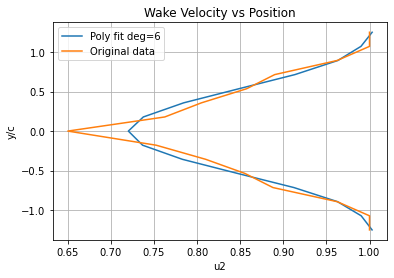

In [51]:
rho = 1.2 # kg/m2: incompressible air
y, u1, u2 = np.loadtxt('WakeVelDist.dat', unpack=True, delimiter=',')

drag = 0
for i in range(len(y)-1):
    drag += (y[i+1]-y[i])*u2[i]*(u1[i]-u2[i])
drag *= rho
print(f'Total drag (original data): {drag}')

fit = np.polyfit(y, u2, deg=6)
u2_fit = np.polyval(fit, y)

drag = 0
for i in range(len(y)-1):
    drag += (y[i+1]-y[i])*u2_fit[i]*(u1[i]-u2_fit[i])
drag *= rho
print(f'Total drag (poly fit data): {drag}')

plt.plot(u2_fit, y, label='Poly fit deg=6')
plt.plot(u2, y, label='Original data')
plt.title('Wake Velocity vs Position')
plt.xlabel('u2')
plt.ylabel('y/c')
plt.legend()
plt.grid()
plt.show()


## Problem 3: XFOIL Introduction 

In this problem, XFOIL is explored and used to calculate fluid flow forces on airfoils.